# Interactoma Fármaco-GenSymbol
Obtuvimos un total de 155 proteinas (gene symbol) que no se repiten y que fueron integradas entre el top 100 degree y el top 100 bottleneck. Posteriormente se extrajeron los genes y se cargaron en la plataforma CTD o Comparative Toxicogenomics Database, para obtener un set de datos de compuestos que interactúan con el gene-symbol. Posteriormente se realizó un filtrado de datos utilizando la Hoja de Cálculo de Google para obtener Fármacos que interactúen con el gene-symbol en humanos.

Construimos un archivo .csv de los datos Fármaco-GenSymbol

Cargar librerias: -pandas- para importar achivos, la libreria -networkx- para crear la red y la libreria -matplilib- para visualizar y analizar la red, cargaremos -numpy- para realizar graficos.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import networkx.algorithms as algs

Importar el archivo CSV y darle un nombre (en este caso NetCTD) usaremos -pandas-

In [2]:
NetCTD = pd.read_csv("e:/Users/Alberto/Desktop/CTD_Top_Curado_csv.csv")

In [3]:
NetCTD

,#Input,ChemicalName,ID Compuond,Organism,Interaction,InteractionActions,PubMedIDs
0,tp53,Calcimycin,D000001,Homo sapiens,Calcimycin results in increased expression of ...,increases^expression,26419736
1,il6,Calcimycin,D000001,Homo sapiens,"3'(R)-O-beta-D-glucopyranosyl-3',4'-dihydroxan...",affects^cotreatment|decreases^reaction|increas...,30496664
2,il6,Calcimycin,D000001,Homo sapiens,[Calcimycin co-treated with phorbol-12-myrista...,affects^cotreatment|increases^expression,12789233
3,il6,Calcimycin,D000001,Homo sapiens,[Calcimycin co-treated with Tetradecanoylphorb...,affects^cotreatment|increases^expression,21515303
4,il6,Calcimycin,D000001,Homo sapiens,Calcimycin inhibits the reaction [Calcium prom...,decreases^reaction|increases^expression|increa...,11238657
...,...,...,...,...,...,...,...
36253,il6,Levofloxacin,D064704,Homo sapiens,[Levofloxacin co-treated with [TNF protein co-...,affects^cotreatment|increases^activity,30876886
36254,tgfb1,Neurokinin-1 Receptor Antagonists,D064729,Homo sapiens,Neurokinin-1 Receptor Antagonists inhibits the...,decreases^reaction|increases^expression,28647476
36255,mapk3,Frankincense,D065260,Homo sapiens,[Frankincense co-treated with myrrh resin] res...,affects^cotreatment|decreases^phosphorylation,35317323
36256,mapk8,Frankincense,D065260,Homo sapiens,[Frankincense co-treated with myrrh resin] res...,affects^cotreatment|decreases^phosphorylation,35317323


In [4]:
print(NetCTD)

      #Input                       ChemicalName ID Compuond      Organism  \
0       tp53                         Calcimycin     D000001  Homo sapiens   
1        il6                         Calcimycin     D000001  Homo sapiens   
2        il6                         Calcimycin     D000001  Homo sapiens   
3        il6                         Calcimycin     D000001  Homo sapiens   
4        il6                         Calcimycin     D000001  Homo sapiens   
...      ...                                ...         ...           ...   
36253    il6                       Levofloxacin     D064704  Homo sapiens   
36254  tgfb1  Neurokinin-1 Receptor Antagonists     D064729  Homo sapiens   
36255  mapk3                       Frankincense     D065260  Homo sapiens   
36256  mapk8                       Frankincense     D065260  Homo sapiens   
36257  mapk1                       Frankincense     D065260  Homo sapiens   

                                             Interaction  \
0      Calcimyc

Generar la red, usaremos -networkx-

In [5]:
RED_CTD = nx.DiGraph
RED_CTD = nx.from_pandas_edgelist(NetCTD, source = "#Input", target = "ChemicalName", edge_attr = ["Interaction", "InteractionActions"])

### Analisis de la Red_CTD

los nodos

In [6]:
RED_CTD.nodes()

NodeView(('tp53', 'Calcimycin', 'il6', 'mapk3', 'rela', 'mapk8', 'mapk1', 'sp1', 'cdkn1a', 'Aripiprazole', 'nfkb1', 'cebpb', 'mapkapk2', 'ets1', 'Risedronic Acid', 'Fluticasone', 'stat3', 'Salmeterol Xinafoate', 'myc', 'Everolimus', 'ccnd1', 'rb1', 'ccna2', 'akt1', 'sirt1', 'mtor', 'eif4ebp1', 'Pemetrexed', 'Dutasteride', 'Interferon beta-1b', 'Celecoxib', 'jun', 'cdk2', 'ccnb1', 'cdk4', 'h2ax', 'mapk14', 'cdkn1b', 'map2k1', 'Varenicline', 'Sildenafil Citrate', 'Emtricitabine', 'Tenofovir', 'Valsartan', 'tgfb1', 'serpine1', 'Formoterol Fumarate', 'Rivastigmine', 'Fingolimod Hydrochloride', 'Imatinib Mesylate', 'cdk1', 'pten', 'raf1', 'Atorvastatin', 'mdm2', 'pik3ca', 'Bortezomib', 'atm', 'e2f1', 'rnf2', 'ehmt2', 'phc3', 'tfdp1', 'vdac1', 'map2k6', 'anapc11', 'mapk9', 'map2k4', 'cdkn2a', 'Capecitabine', 'rbbp4', 'Erlotinib Hydrochloride', 'foxo3', 'cdk6', 'Dasatinib', 'ezh2', 'h2bc3', 'h2bc14', 'h2bc9', 'cdc25a', 'hmga2', 'h1-5', 'h1-1', 'h1-4', 'Atazanavir Sulfate', 'mapkapk3', 'Liragl

Interacciones de la red.

In [7]:
RED_CTD.edges()

EdgeView([('tp53', 'Calcimycin'), ('tp53', 'Pemetrexed'), ('tp53', 'Celecoxib'), ('tp53', 'Sildenafil Citrate'), ('tp53', 'Emtricitabine'), ('tp53', 'Tenofovir'), ('tp53', 'Rivastigmine'), ('tp53', 'Fingolimod Hydrochloride'), ('tp53', 'Imatinib Mesylate'), ('tp53', 'Atorvastatin'), ('tp53', 'Bortezomib'), ('tp53', 'Erlotinib Hydrochloride'), ('tp53', 'Dasatinib'), ('tp53', 'Bendamustine Hydrochloride'), ('tp53', 'Polychlorinated Dibenzodioxins'), ('tp53', 'Dibenzofurans, Polychlorinated'), ('tp53', 'Antineoplastic Agents, Immunological'), ('tp53', 'Docetaxel'), ('tp53', 'Clopidogrel'), ('tp53', 'Irinotecan'), ('tp53', 'Sevoflurane'), ('tp53', 'Oxaliplatin'), ('tp53', 'Olanzapine'), ('tp53', 'Rosiglitazone'), ('tp53', 'Gefitinib'), ('tp53', 'Sorafenib'), ('tp53', 'Resveratrol'), ('tp53', 'Wortmannin'), ('tp53', 'Temozolomide'), ('tp53', 'Decitabine'), ('tp53', 'Zoledronic Acid'), ('tp53', 'Limonene'), ('tp53', 'Arsenic Trioxide'), ('tp53', 'Fulvestrant'), ('tp53', 'Lycopene'), ('tp53',

Para visualizar la red usaremos -matplotlib-

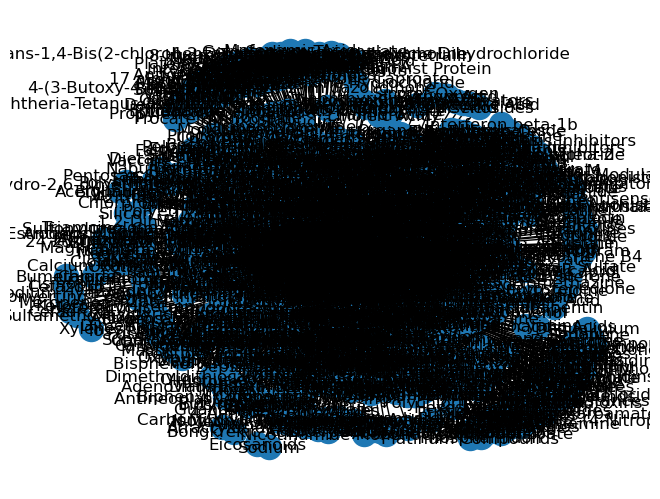

In [8]:
nx.draw(RED_CTD, with_labels=True)
plt.show()

para ver la red en forma circular

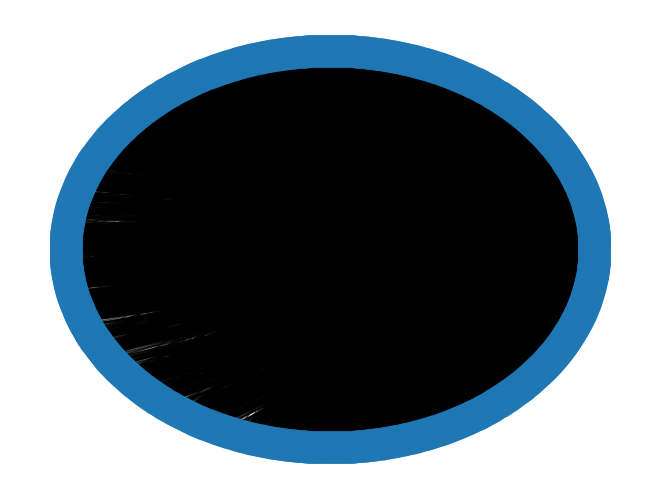

In [9]:
nx.draw_circular(RED_CTD, node_size=500, alpha=0.5, with_labels=False)

para ver la red por nodos

In [10]:
pos = nx.spring_layout(RED_CTD)

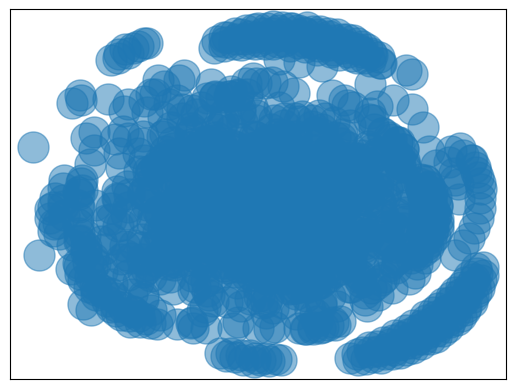

In [11]:
nx.draw_networkx_nodes(RED_CTD, pos, node_size=500, alpha=0.5)

para ver la red por aristas

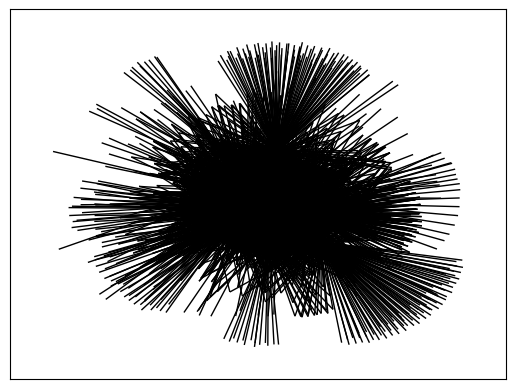

In [12]:
nx.draw_networkx_edges(RED_CTD, pos)

Para ver la red de forma spectral, este plot nos permite ver la alta condensación de la red.

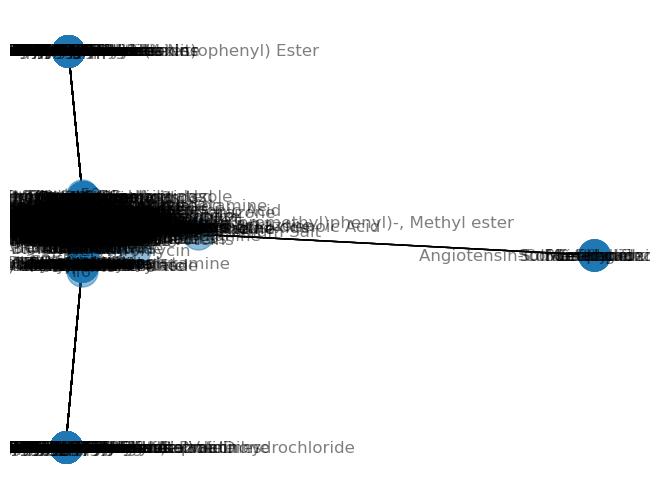

In [13]:
nx.draw_spectral(RED_CTD, node_size=500, alpha=0.5, with_labels=True)

### Analizar la red

edge-label, par ver los datos de las interacciones.

{('tp53',
  'Calcimycin'): Text(0.1426088404841721, 0.20665549859404564, "{'Interaction': 'Calcimycin results in increased expression of TP53 mRNA', 'InteractionActions': 'increases^expression'}"),
 ('tp53',
  'Pemetrexed'): Text(-0.16800626693293452, 0.35732729732990265, "{'Interaction': 'TP53 protein affects the susceptibility to Pemetrexed', 'InteractionActions': 'affects^response to substance'}"),
 ('tp53',
  'Celecoxib'): Text(0.023997160140424967, 0.11701086908578873, "{'Interaction': 'TP53 results in increased susceptibility to Celecoxib', 'InteractionActions': 'increases^response to substance'}"),
 ('tp53',
  'Sildenafil Citrate'): Text(-0.11859336076304317, 0.5999709367752075, "{'Interaction': 'TP53 protein inhibits the reaction [Sildenafil Citrate results in increased susceptibility to Doxorubicin]', 'InteractionActions': 'decreases^reaction|increases^response to substance'}"),
 ('tp53',
  'Emtricitabine'): Text(-0.11689213244244456, 0.46279749274253845, "{'Interaction': '[Em

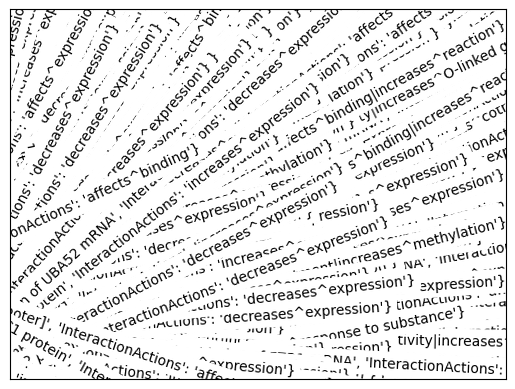

In [14]:
nx.draw_networkx_edge_labels(RED_CTD, pos)

Numero de nodos

In [15]:
RED_CTD.number_of_nodes()

1446

numero de aristas

In [16]:
RED_CTD.number_of_edges()

11670

Tamaño de la red

In [17]:
RED_CTD.size()

11670

Grado de conexión de los nodos

In [15]:
nx.degree(RED_CTD)

DegreeView({'tp53': 514, 'Calcimycin': 7, 'il6': 491, 'mapk3': 469, 'rela': 319, 'mapk8': 193, 'mapk1': 474, 'sp1': 106, 'cdkn1a': 345, 'Aripiprazole': 6, 'nfkb1': 210, 'cebpb': 112, 'mapkapk2': 46, 'ets1': 61, 'Risedronic Acid': 2, 'Fluticasone': 4, 'stat3': 175, 'Salmeterol Xinafoate': 3, 'myc': 229, 'Everolimus': 8, 'ccnd1': 271, 'rb1': 159, 'ccna2': 144, 'akt1': 297, 'sirt1': 122, 'mtor': 145, 'eif4ebp1': 88, 'Pemetrexed': 3, 'Dutasteride': 1, 'Interferon beta-1b': 1, 'Celecoxib': 20, 'jun': 253, 'cdk2': 137, 'ccnb1': 163, 'cdk4': 110, 'h2ax': 200, 'mapk14': 128, 'cdkn1b': 161, 'map2k1': 94, 'Varenicline': 2, 'Sildenafil Citrate': 1, 'Emtricitabine': 2, 'Tenofovir': 3, 'Valsartan': 4, 'tgfb1': 231, 'serpine1': 165, 'Formoterol Fumarate': 2, 'Rivastigmine': 1, 'Fingolimod Hydrochloride': 6, 'Imatinib Mesylate': 19, 'cdk1': 152, 'pten': 109, 'raf1': 73, 'Atorvastatin': 14, 'mdm2': 118, 'pik3ca': 58, 'Bortezomib': 37, 'atm': 116, 'e2f1': 89, 'rnf2': 18, 'ehmt2': 32, 'phc3': 23, 'tfdp1

Calcular el grado de cada nodo en un directorio/diccionario

In [16]:
grado = dict(RED_CTD.degree())

Encontrar el nodo con mayor conexión (grado mayor)

In [17]:
nodo_mayor_conexion = max(grado, key=grado.get)

Encontrar el nodo con menor conexión (grado menor)

In [18]:
nodo_menor_conexion = min(grado, key=grado.get)

Imprimir el resultado de los nodos con mayor y menor grado de conexión de la red

In [19]:
print(f"El nodo con mayor conexión es {nodo_mayor_conexion} con un grado de {grado[nodo_mayor_conexion]}")
print(f"El nodo con menor conexión es {nodo_menor_conexion} con un grado de {grado[nodo_menor_conexion]}")

El nodo con mayor conexión es tp53 con un grado de 514
El nodo con menor conexión es Dutasteride con un grado de 1


Obtener el Top 10 de los nodos mas conectados de la red

In [20]:
grado = dict(RED_CTD.degree())

In [21]:
top_10_conectados = sorted(grado.items(), key=lambda x: x[1], reverse=True)[:10]

In [25]:
print(f"Los top 10 de los nodos más conectados son:")
for nodo, grado in top_10_conectados:
    print(f"{nodo} con un grado de {grado}")

Los top 10 de los nodos más conectados son:
tp53 con un grado de 514
il6 con un grado de 491
mapk1 con un grado de 474
mapk3 con un grado de 469
cdkn1a con un grado de 345
rela con un grado de 319
akt1 con un grado de 297
ccnd1 con un grado de 271
jun con un grado de 253
fos con un grado de 237


Obtener el Top 10 de los nodos menos conectados de la red

In [22]:
grado = dict(RED_CTD.degree())

In [23]:
top_10_menos_conectados = sorted(grado.items(), key=lambda x: x[1])[:10]

In [24]:
print(f"Los top 10 de los nodos menos conectados son:")
for nodo, grado in top_10_menos_conectados:
    print(f"{nodo} con un grado de {grado}")

Los top 10 de los nodos menos conectados son:
Dutasteride con un grado de 1
Interferon beta-1b con un grado de 1
Sildenafil Citrate con un grado de 1
Rivastigmine con un grado de 1
Liraglutide con un grado de 1
Bendamustine Hydrochloride con un grado de 1
Dimethyl Fumarate con un grado de 1
Febuxostat con un grado de 1
Venlafaxine Hydrochloride con un grado de 1
Mastic Resin con un grado de 1


Obtener el top 75 de los nodos mas conectados

In [25]:
grado = dict(RED_CTD.degree())

In [26]:
top_75_mas_conectados = sorted(grado.items(), key=lambda x: x[1], reverse=True)[:75]

In [27]:
print(f"Los top 75 de los nodos más conectados son:")
for nodo, grado in top_75_mas_conectados:
    print(f"{nodo} con un grado de {grado}")

Los top 75 de los nodos más conectados son:
tp53 con un grado de 514
il6 con un grado de 491
mapk1 con un grado de 474
mapk3 con un grado de 469
cdkn1a con un grado de 345
rela con un grado de 319
akt1 con un grado de 297
ccnd1 con un grado de 271
jun con un grado de 253
fos con un grado de 237
tgfb1 con un grado de 231
myc con un grado de 229
nfkb1 con un grado de 210
h2ax con un grado de 200
mapk8 con un grado de 193
stat3 con un grado de 175
serpine1 con un grado de 165
ccnb1 con un grado de 163
cdkn1b con un grado de 161
rb1 con un grado de 159
cdk1 con un grado de 152
mtor con un grado de 145
ccna2 con un grado de 144
cdk2 con un grado de 137
Benzo(a)pyrene con un grado de 130
Valproic Acid con un grado de 129
mapk14 con un grado de 128
mapk9 con un grado de 124
sirt1 con un grado de 122
mdm2 con un grado de 118
ccne1 con un grado de 117
atm con un grado de 116
cebpb con un grado de 112
cdk4 con un grado de 110
pten con un grado de 109
sp1 con un grado de 106
Cisplatin con un grad

Para hacer una gráfica de barras hay que separar los nombres de los nodos y sus grados en dos listas separadas

In [28]:
nodos = [nodo for nodo, grado in top_75_mas_conectados]
grados = [grado for nodo, grado in top_75_mas_conectados]

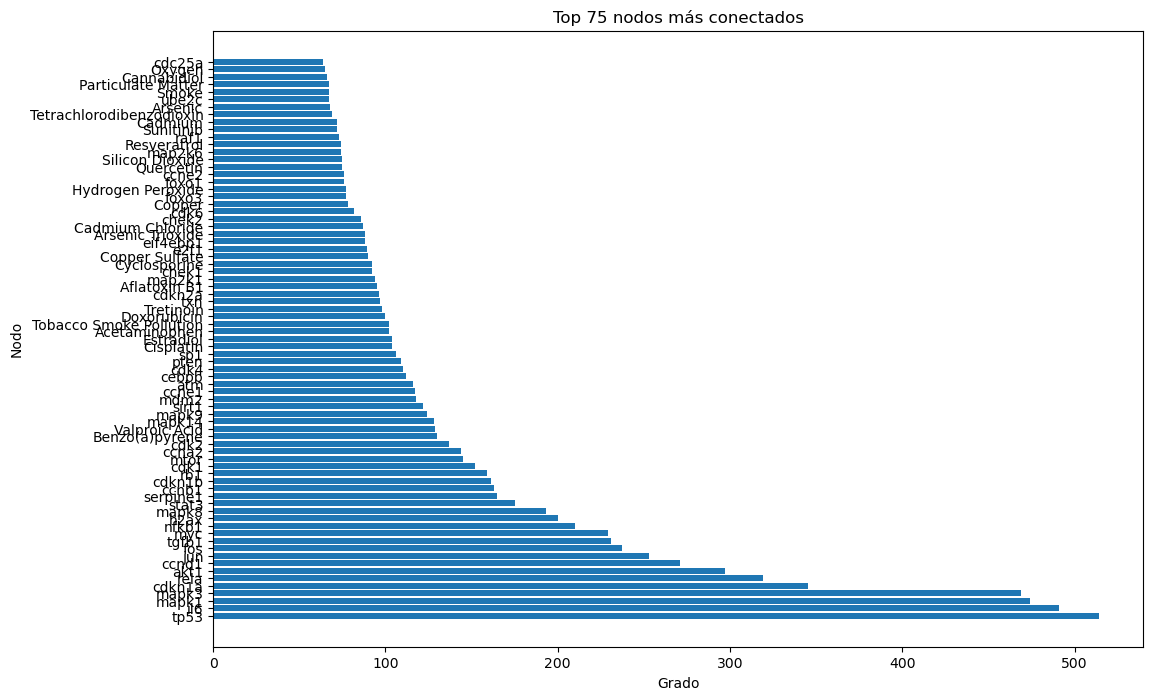

In [29]:
plt.figure(figsize=(12, 8))
plt.barh(nodos, grados)
plt.xlabel('Grado')
plt.ylabel('Nodo')
plt.title('Top 75 nodos más conectados')
plt.show()

Generar una variable que nos permita ver en un plot el comportamiento de los nodos.

In [30]:
Hist_degree = nx.degree(RED_CTD)

In [31]:
grados_dict = dict(Hist_degree)

In [32]:
valores, frecuencias = zip(*grados_dict.items())

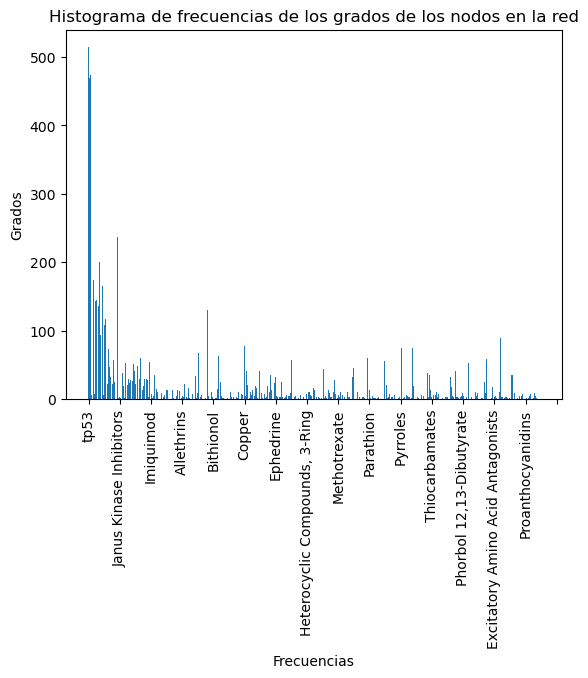

In [33]:
plt.bar(valores, frecuencias)
plt.ylabel('Grados')
plt.xlabel('Frecuencias')
plt.title('Histograma de frecuencias de los grados de los nodos en la red')
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(100))
plt.xticks(rotation=90)
plt.show()

In [34]:
Hist_degree 

DegreeView({'tp53': 514, 'Calcimycin': 7, 'il6': 491, 'mapk3': 469, 'rela': 319, 'mapk8': 193, 'mapk1': 474, 'sp1': 106, 'cdkn1a': 345, 'Aripiprazole': 6, 'nfkb1': 210, 'cebpb': 112, 'mapkapk2': 46, 'ets1': 61, 'Risedronic Acid': 2, 'Fluticasone': 4, 'stat3': 175, 'Salmeterol Xinafoate': 3, 'myc': 229, 'Everolimus': 8, 'ccnd1': 271, 'rb1': 159, 'ccna2': 144, 'akt1': 297, 'sirt1': 122, 'mtor': 145, 'eif4ebp1': 88, 'Pemetrexed': 3, 'Dutasteride': 1, 'Interferon beta-1b': 1, 'Celecoxib': 20, 'jun': 253, 'cdk2': 137, 'ccnb1': 163, 'cdk4': 110, 'h2ax': 200, 'mapk14': 128, 'cdkn1b': 161, 'map2k1': 94, 'Varenicline': 2, 'Sildenafil Citrate': 1, 'Emtricitabine': 2, 'Tenofovir': 3, 'Valsartan': 4, 'tgfb1': 231, 'serpine1': 165, 'Formoterol Fumarate': 2, 'Rivastigmine': 1, 'Fingolimod Hydrochloride': 6, 'Imatinib Mesylate': 19, 'cdk1': 152, 'pten': 109, 'raf1': 73, 'Atorvastatin': 14, 'mdm2': 118, 'pik3ca': 58, 'Bortezomib': 37, 'atm': 116, 'e2f1': 89, 'rnf2': 18, 'ehmt2': 32, 'phc3': 23, 'tfdp1

Ordenar los grados

In [35]:
Orden_degree = sorted(grados_dict.items(), key=lambda x: x[1], reverse=True)

In [36]:
xOrden_degree = list(map(str, Orden_degree))

In [37]:
xOrden_degree

["('tp53', 514)",
 "('il6', 491)",
 "('mapk1', 474)",
 "('mapk3', 469)",
 "('cdkn1a', 345)",
 "('rela', 319)",
 "('akt1', 297)",
 "('ccnd1', 271)",
 "('jun', 253)",
 "('fos', 237)",
 "('tgfb1', 231)",
 "('myc', 229)",
 "('nfkb1', 210)",
 "('h2ax', 200)",
 "('mapk8', 193)",
 "('stat3', 175)",
 "('serpine1', 165)",
 "('ccnb1', 163)",
 "('cdkn1b', 161)",
 "('rb1', 159)",
 "('cdk1', 152)",
 "('mtor', 145)",
 "('ccna2', 144)",
 "('cdk2', 137)",
 "('Benzo(a)pyrene', 130)",
 "('Valproic Acid', 129)",
 "('mapk14', 128)",
 "('mapk9', 124)",
 "('sirt1', 122)",
 "('mdm2', 118)",
 "('ccne1', 117)",
 "('atm', 116)",
 "('cebpb', 112)",
 "('cdk4', 110)",
 "('pten', 109)",
 "('sp1', 106)",
 "('Cisplatin', 104)",
 "('Estradiol', 104)",
 "('Acetaminophen', 102)",
 "('Tobacco Smoke Pollution', 102)",
 "('Doxorubicin', 100)",
 "('Tretinoin', 98)",
 "('txn', 97)",
 "('cdkn2a', 96)",
 "('Aflatoxin B1', 95)",
 "('map2k1', 94)",
 "('chek1', 92)",
 "('Cyclosporine', 92)",
 "('Copper Sulfate', 90)",
 "('e2f1', 

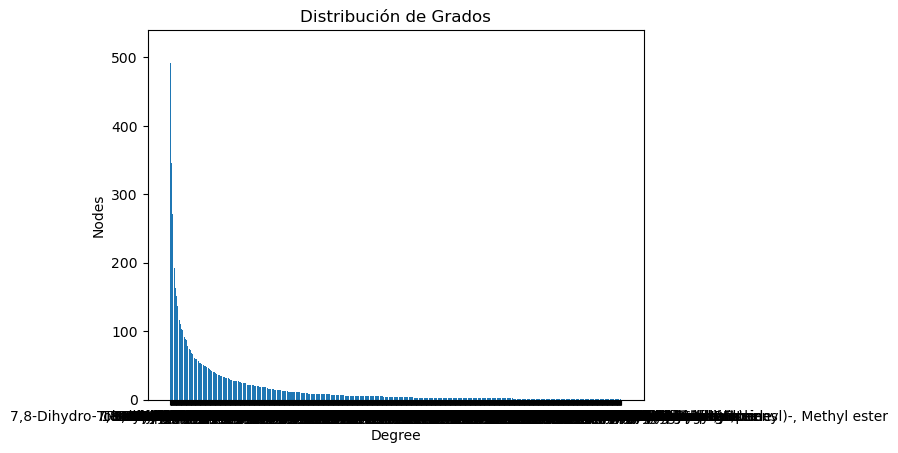

In [40]:
nodes = [x[0] for x in Orden_degree]
degrees = [x[1] for x in Orden_degree]
plt.bar(nodes, degrees)
plt.ylabel('Nodes')
plt.xlabel('Degree')
plt.title('Distribución de Grados')
plt.show()